<a href="https://colab.research.google.com/github/KacioSilva/ProjetoAM/blob/main/Prova_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avaliação da Disciplina de Aprendizado de Máquina - 1° Unidade;
Equipe: Kácio Silva, Luciano Bruno e Tyago Ferreira.

# Carregando o conjunto de dados usando a biblioteca Pandas

In [33]:
import pandas as pd
import numpy as np

In [34]:
url = 'https://raw.githubusercontent.com/KacioSilva/ProjetoAM/main/parkinsons_updrs.csv'
df = pd.read_csv(url)

#Funções

essa função faz o cálculo dos limites superiores e inferiores e retorna a quantidade de outliers

In [35]:
def calcularQTD_outliers(column_name, df):

  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  outliers = df[(df[column_name] < Q1 - 1.5 * IQR) | (df[column_name] > Q3 + 1.5 * IQR)]

  quantidade_outliers = len(outliers)
  return quantidade_outliers

essa função foi utilizada para a substituição dos outliers pela mediana.

In [36]:
def substituir_outliers_por_mediana(dataframe):

    for coluna in dataframe.select_dtypes(include=[np.number]).columns:

        mediana = dataframe[coluna].median()

        Q1 = dataframe[coluna].quantile(0.25)
        Q3 = dataframe[coluna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = (dataframe[coluna] < limite_inferior) | (dataframe[coluna] > limite_superior)

        dataframe.loc[outliers, coluna] = mediana

    return dataframe

#Leitura, análise e tratamento inicial do dataset

In [37]:
df.head(15)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,1,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,1,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,1,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,1,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


Inicialmente, percebe-se que há colunas que não farão diferenças para o nosso conjunto de dados. Nesse caso, removeremos a coluna Subject#, pois indica somente um identificador do usuário.

Além disso, é importante notar que a coluna test_time representa a quantidade de dias como um valor contínuo, o que não é interessante. Para isso, transformaremos o valor contínuo em discreto.

In [38]:
df = df.drop('subject#', axis=1)

df['test_time'] = df['test_time'].round(0)
df.head(15)

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,6.0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,13.0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,20.0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,26.0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,34.0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,72,0,41.0,29.435,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,72,0,48.0,29.682,37.363,0.00422,0.000024,0.00212,0.00221,0.00637,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,72,0,55.0,29.928,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,72,0,62.0,30.177,38.353,0.00432,0.000029,0.00156,0.00207,0.00468,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,72,0,69.0,30.424,38.849,0.00496,0.000027,0.00258,0.00253,0.00773,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


Utilizamos o método describe para verificar medidas estatísticas das nossas colunas NUMÉRICAS. Para isso, precisamos eliminar, do método, a coluna sex.

Nesse caso, foi verificado que possuímos inconsistências na coluna test_time, pois o valor inteiro indica a quantidade em dias e não pode assumir valores negativos.

In [39]:
df.drop('sex', axis=1).describe()

,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,92.789957,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,8.821524,53.459124,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,36.000000,-4.000000,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,47.000000,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,65.000000,92.000000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,72.000000,138.000000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,85.000000,215.000000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Removendo os valores negativos da coluna test_time.

In [40]:
df = df[df['test_time'] >= 0]

df.drop('sex', axis=1).describe()

,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,64.814771,92.987037,21.289655,29.014090,0.006156,0.000044,0.002988,0.003278,0.008965,0.034038,0.311012,0.017157,0.020149,0.027489,0.051470,0.032126,21.679527,0.541423,0.653252,0.219618
std,8.827750,53.335812,8.133419,10.709966,0.005628,0.000036,0.003126,0.003734,0.009378,0.025836,0.230310,0.013237,0.016672,0.020002,0.039710,0.059735,4.292521,0.101024,0.070955,0.091494
min,36.000000,0.000000,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,47.000000,15.000000,21.362000,0.003580,0.000022,0.001580,0.001825,0.004730,0.019110,0.175000,0.009280,0.010790,0.015660,0.027830,0.010953,19.404000,0.469695,0.596100,0.156385
50%,65.000000,92.000000,20.871000,27.522000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027530,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.917000,0.542250,0.643550,0.205560
75%,72.000000,138.000000,27.594000,36.400500,0.006800,0.000053,0.003290,0.003470,0.009880,0.039775,0.365000,0.020605,0.023775,0.032725,0.061805,0.031464,24.445500,0.614045,0.711480,0.264590
max,85.000000,215.000000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Nesse momento, é interessante visualizar se a base de dados possui valores ausentes para que possam ser tratados. Como é possível visualizar, não é possível encontrar valores ausentes na base de dados.

In [41]:
df.isnull().sum()

age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

Verificamos também que não possuímos dados duplicados em nossa base de dados.

In [42]:
duplicatas = df[df.duplicated(keep=False)]

if not duplicatas.empty:
    print("Valores duplicados encontrados:")
    print(duplicatas)
else:
    print("Nenhuma duplicata encontrada.")

Nenhuma duplicata encontrada.


Utilizaremos como coluna alvo total_UPDRS.

Como utilizaremos um modelo de classificação, é necessário dar início a discretização dos dados da coluna total_UPDRS.

OBS: Como não somos especialistas na área de saúde, não conseguimos definir até que ponto a pontuação é considerada baixa, média e alta. Para isso, distribuímos o conjunto de valor em valores arbritrários com fins representativos.

In [43]:
import pandas as pd

bins = [0, 10, 20, 30, 40, 55]

#labels = ['baixissimo', 'baixo', 'médio', 'alto', 'altissimo']
labels = [0, 1, 2, 3, 4]

df['total_UPDRS_discretizada'] = pd.cut(df['total_UPDRS'], bins=bins, labels=labels)

print(df['total_UPDRS_discretizada'])

0       3
1       3
2       3
3       3
4       3
       ..
5870    3
5871    3
5872    3
5873    3
5874    3
Name: total_UPDRS_discretizada, Length: 5863, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]


Para utilizarmos a nova coluna na matriz de correlação, deveremos transformar os valores da nova coluna para inteiro. Como foi verificado, ela está como category.

In [44]:
df.dtypes

age                            int64
sex                            int64
test_time                    float64
motor_UPDRS                  float64
total_UPDRS                  float64
Jitter(%)                    float64
Jitter(Abs)                  float64
Jitter:RAP                   float64
Jitter:PPQ5                  float64
Jitter:DDP                   float64
Shimmer                      float64
Shimmer(dB)                  float64
Shimmer:APQ3                 float64
Shimmer:APQ5                 float64
Shimmer:APQ11                float64
Shimmer:DDA                  float64
NHR                          float64
HNR                          float64
RPDE                         float64
DFA                          float64
PPE                          float64
total_UPDRS_discretizada    category
dtype: object

transformando o valor category para int64. Além disso, removeremos a coluna antiga do nosso dataset.

In [45]:
df['total_UPDRS_discretizada'] = df['total_UPDRS_discretizada'].astype('int64')

df.drop(columns='total_UPDRS', axis=1, inplace=True)

df.dtypes

age                           int64
sex                           int64
test_time                   float64
motor_UPDRS                 float64
Jitter(%)                   float64
Jitter(Abs)                 float64
Jitter:RAP                  float64
Jitter:PPQ5                 float64
Jitter:DDP                  float64
Shimmer                     float64
Shimmer(dB)                 float64
Shimmer:APQ3                float64
Shimmer:APQ5                float64
Shimmer:APQ11               float64
Shimmer:DDA                 float64
NHR                         float64
HNR                         float64
RPDE                        float64
DFA                         float64
PPE                         float64
total_UPDRS_discretizada      int64
dtype: object

Iremos discretizar também a coluna age para remover possíveis outliers e deixar de forma mais categórica.

In [46]:
import pandas as pd

labels = [0, 1]
bins = [0, 59, 105]

df['age_discretizada'] = pd.cut(df['age'], bins=bins, labels=labels)

print(df['age_discretizada'])

0       1
1       1
2       1
3       1
4       1
       ..
5870    1
5871    1
5872    1
5873    1
5874    1
Name: age_discretizada, Length: 5863, dtype: category
Categories (2, int64): [0 < 1]


Para utilizar a nova coluna na matriz de correlação, é necessário mudar do tipo category para o tipo int64. Além disso, removeremos a coluna antiga do nosso dataset.

In [47]:
df['age_discretizada'] = df['age_discretizada'].astype('int64')
df.drop(columns='age', axis=1, inplace=True)
df.dtypes

sex                           int64
test_time                   float64
motor_UPDRS                 float64
Jitter(%)                   float64
Jitter(Abs)                 float64
Jitter:RAP                  float64
Jitter:PPQ5                 float64
Jitter:DDP                  float64
Shimmer                     float64
Shimmer(dB)                 float64
Shimmer:APQ3                float64
Shimmer:APQ5                float64
Shimmer:APQ11               float64
Shimmer:DDA                 float64
NHR                         float64
HNR                         float64
RPDE                        float64
DFA                         float64
PPE                         float64
total_UPDRS_discretizada      int64
age_discretizada              int64
dtype: object

Nesse trecho, achamos por necessário visualizar quais dados têm uma correlação tanto forte positiva quanto forte negativa. No caso, é importante para que no futuro possamos utilizar as variáveis certas como preditivas de acordo com a saída desejada.

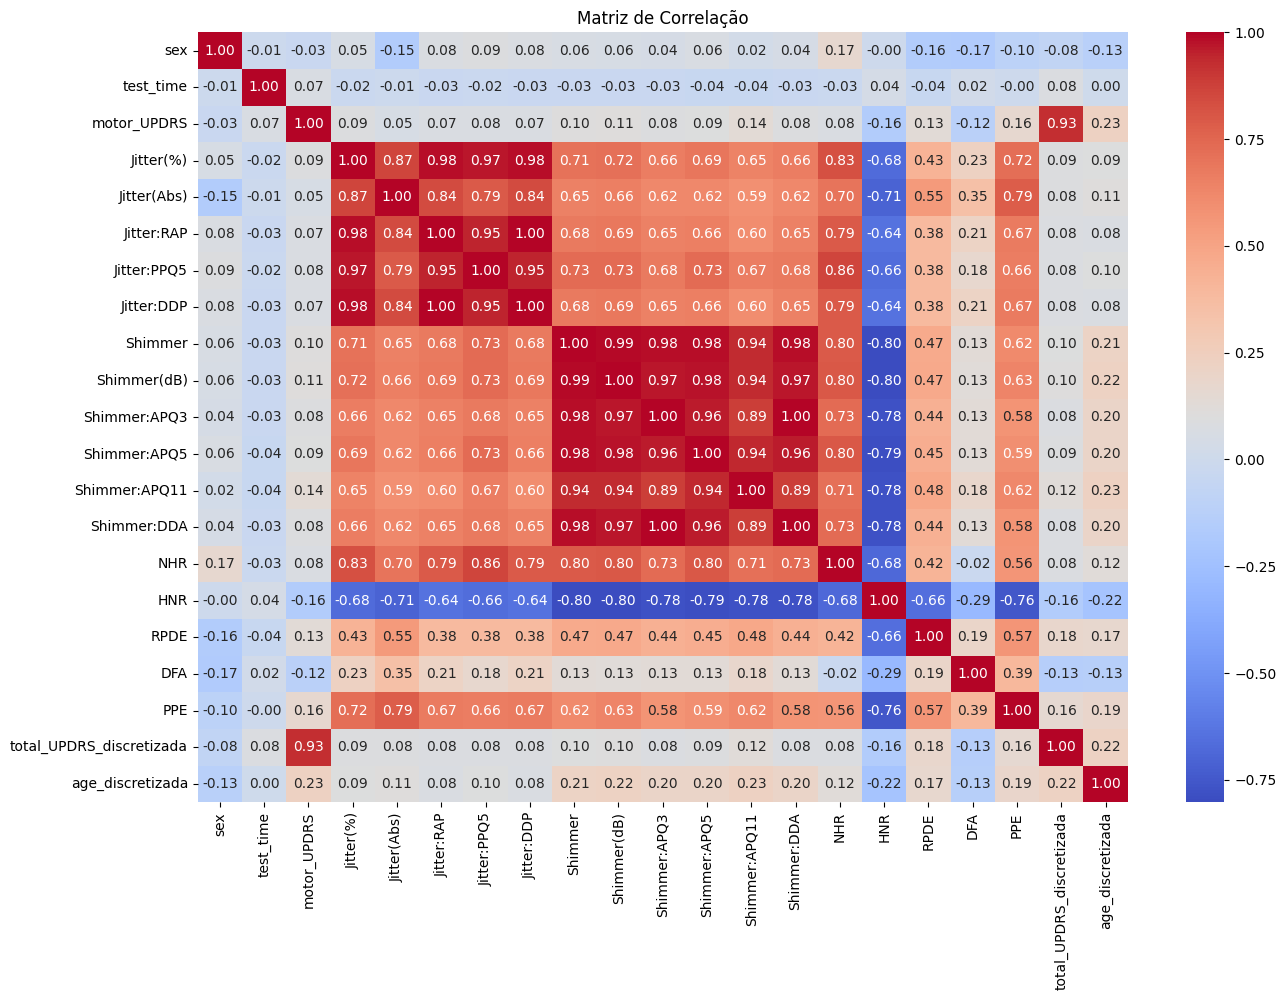

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# age_discretizada
Análise inicial da coluna de IDADE.

A maior parte da divisão entre faixa etária está classificado como idoso. A menor parte está classificado como Adulto. Talvez por termos feito a discretização da variável, não foi possível detectar outliers com a utilização da função calcularQTD_outliers.

Quantidade de Outliers:  0


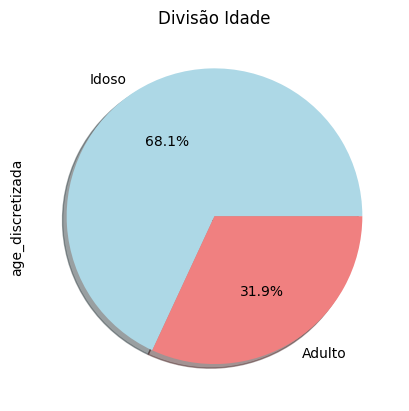

In [49]:
cores = ['lightblue', 'lightcoral']
labels = ['Idoso', 'Adulto']
faixa_etaria = df['age_discretizada'].value_counts()
faixa_etaria.plot(kind='pie', title='Divisão Idade', colors=cores, labels=labels, shadow=True, autopct='%1.1f%%')

print("Quantidade de Outliers: ", calcularQTD_outliers('age_discretizada', df))

# sex
Análise Inicial da coluna de Sexo.

 Percebe-se que a maioria da minha amostra são de pacientes do sexo MASCULINO e a menor parte do sexo FEMININO. Também utilizando a função calcularQTD_outliers, não aconteceu a detecção de outliers.

Quantidade de Outliers:  0


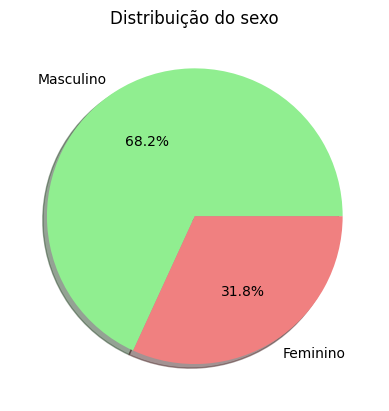

In [50]:
%matplotlib inline

colunaSexo = df['sex'].value_counts()
cores = ['lightgreen', 'lightcoral']
labels = ['Masculino', 'Feminino']

plt.pie(colunaSexo, colors=cores, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Distribuição do sexo')

print("Quantidade de Outliers: ", calcularQTD_outliers('sex', df))

# test_time
Para a visualização da coluna test_time, foi utilizado o gráfico do tipo boxplot pois ele é ideal para analisar a distribuição de valores na faixa de tempo com um grande volume de informações.

As informações tiradas desse gráfico são que não possuímos outliers nessa coluna, além de que os dados estão bem distribuídos entre o primeiro quartil, mediana e terceiro quartil.

Além da visualização gráfica, a função calcularQTD_outliers ainda complementa o gráfico confirmando que não possuem dados discrepantes na coluna.

Quantidade de Outliers:  0


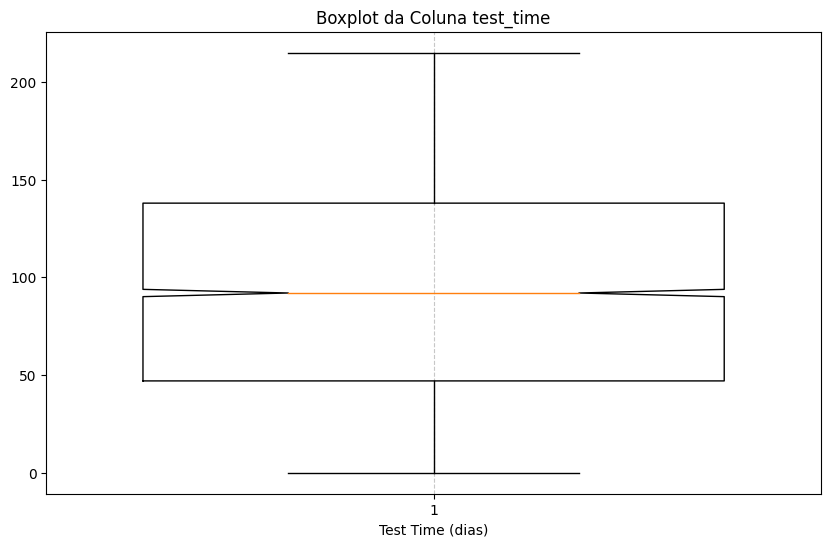

In [51]:
import pandas as pd

plt.figure(figsize=(10, 6))
plt.xlabel('Test Time (dias)')
plt.title('Boxplot da Coluna test_time')

plt.boxplot(df['test_time'], sym='gx', widths=.75, notch=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)

print("Quantidade de Outliers: ", calcularQTD_outliers('test_time', df))
plt.show()

#total_UPDRS_discretizada
Análise inicial da coluna total_UPDRS_discretizada.



De acordo com a divisão feita quando discretizamos o valor da coluna total_UPDRS, podemos concluir que ficou com uma distribuição consideravelmente equilibrada. A função calcularQTD_outliers também comprova a existência de outliers.

Quantidade de Outliers:  191


Text(0.5, 1.0, 'Total_UPDRS')

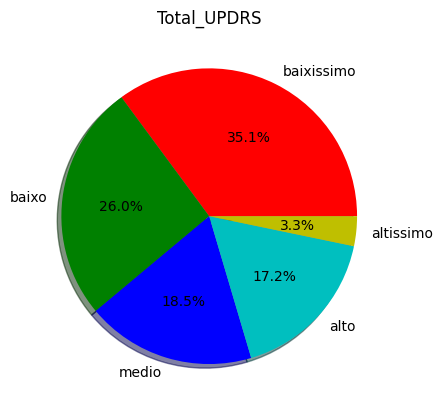

In [52]:
colunaTotalUPDRS = df['total_UPDRS_discretizada'].value_counts()
cores = ['r', 'g', 'b', 'c', 'y']
labels = ['baixissimo', 'baixo','medio','alto','altissimo']


print("Quantidade de Outliers: ", calcularQTD_outliers('total_UPDRS_discretizada', df))
plt.pie(colunaTotalUPDRS, colors=cores, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Total_UPDRS")

Gráfico de correlação entre as colunas 'total_UPDRS' e 'age' para que seja identificada a faixa etária em que o parkinson tem a maior gravidade com base na média de idade dos indivíduos


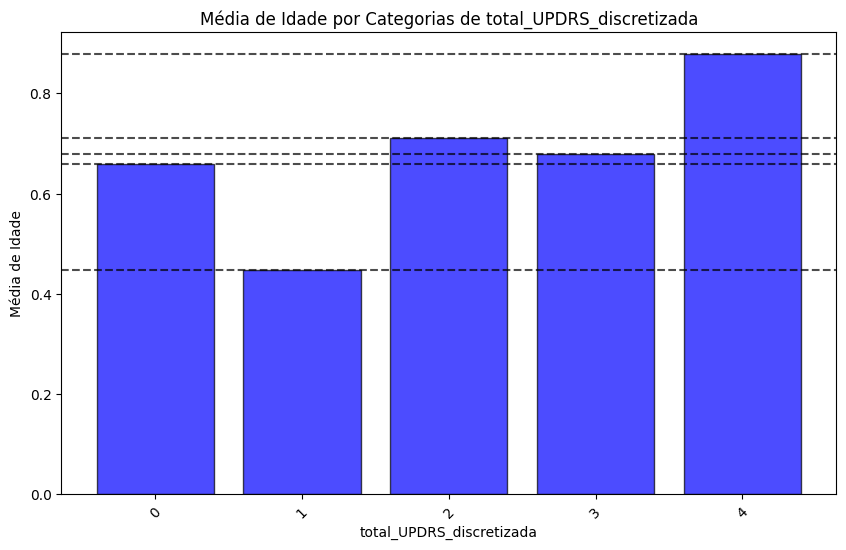

In [53]:
import matplotlib.pyplot as plt

contagem = df['total_UPDRS_discretizada'].value_counts()

categorias = contagem.index

alturas = [df[df['total_UPDRS_discretizada'] == cat]['age_discretizada'].mean() for cat in categorias]

plt.figure(figsize=(10, 6))
plt.bar(categorias, alturas, color='b', alpha=0.7,  edgecolor='black')
plt.title('Média de Idade por Categorias de total_UPDRS_discretizada')
plt.xlabel('total_UPDRS_discretizada')
plt.ylabel('Média de Idade')
plt.xticks(rotation=45)

for altura in alturas:
    plt.axhline(y=altura, color='black', linestyle='--', alpha=0.7)

plt.show()

#Jitter(%)
O gráfico de histograma mostra a distribuição da medida de Jitter em porcentagem. Pela diversidade de valores, conseguimos visualizar graficamente a presença de outliers: a maior parte dos valores estão com uma frequência alta, enquanto há valores distribuídos em frequências muito baixas.

Além disso, podemos visualizar que a função calcularQTD_outliers confirma a visualização do gráfico, indicando a quantidade de outliers.

Quantidade de Outliers:  397


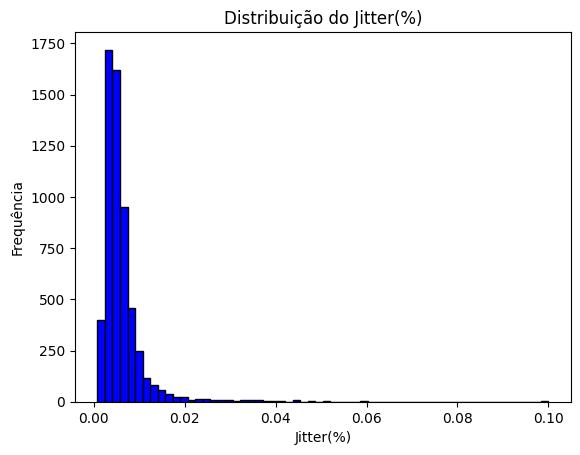

In [54]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Jitter(%)', df))

plt.hist(df['Jitter(%)'], bins=60, color='blue', edgecolor='black')
plt.title('Distribuição do Jitter(%)')
plt.xlabel('Jitter(%)')
plt.ylabel('Frequência')
plt.show()

#Jitter(Abs)
O gráfico de histograma representa a distribuição da medida Jitter em valores absolutos(Abs). Assim como no caso anterior, a maioria dos valores de Jitter está concentrada em torno de um valor central, mas existem algumas medições com valores absolutos mais altos, indicando variações maiores na frequência fundamental. Ou seja, visualmente, é possível notar a presença de outliers.

A função calcularQTD_outliers confirma a presença de outliers, indicando quantos outliers possuem na coluna.

Quantidade de Outliers:  365


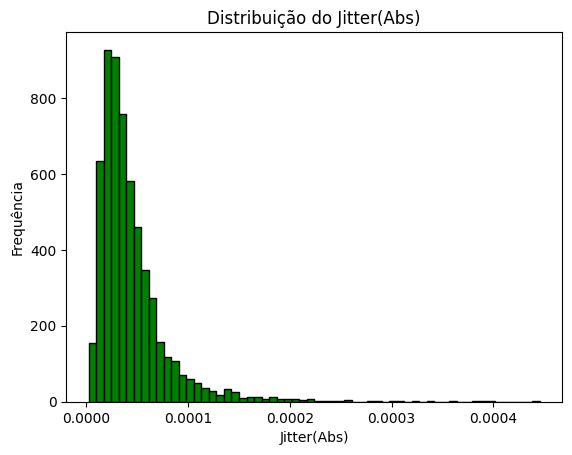

365

In [55]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Jitter(Abs)', df))

plt.hist(df['Jitter(Abs)'], bins=60, color='green', edgecolor='black')
plt.title('Distribuição do Jitter(Abs)')
plt.xlabel('Jitter(Abs)')
plt.ylabel('Frequência')
plt.show()

calcularQTD_outliers('Jitter(Abs)', df)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = removerOutliers('Jitter(Abs)', df)
calcularQTD_outliers('Jitter(Abs)', df)

# CRIANDO O HISTOGRAMA
plt.hist(df['Jitter(Abs)'], bins=60, color='blue', edgecolor='black')
plt.title('Distribuição do Jitter(Abs)')
plt.xlabel('Jitter(Abs)')
plt.ylabel('Frequência')
plt.show()

NameError: ignored

#Jitter:RAP
O histograma mostra a distribuição da taxa de Jitter absoluta (Jitter:RAP). A maioria das medições possui uma taxa de Jitter baixa, mas há algumas medições com taxas de Jitter absolutas mais elevadas. Isso sugere que a maioria das amostras de voz é estável em relação à variação na frequência fundamental, mas algumas podem ter variações rápidas. Dessa forma, percebemos que a maior parte da distribuição está em um intervalo de frequência específico, enquanto possuímos distribuições com uma freqência muito baixa que se difere do padrão, ocasionando os famosos outliers.

Para confirmar a quantidade de outliers, utilizamos a função calcularQTD_outliers.

Quantidade de Outliers:  413


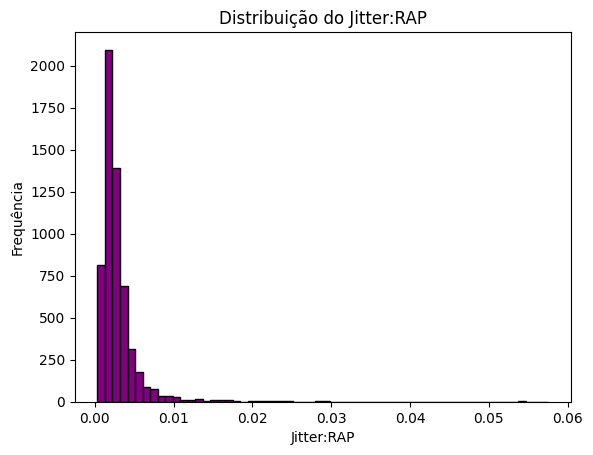

In [57]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Jitter:RAP', df))

plt.hist(df['Jitter:RAP'], bins=60, color='purple', edgecolor='black')
plt.title('Distribuição do Jitter:RAP')
plt.xlabel('Jitter:RAP')
plt.ylabel('Frequência')
plt.show()

Como os valores estão distribuídos em um intervalo pequeno, achamos por melhor dividir os valores em 3 quartis. Além disso, mudamos o tipo da coluna de category para int64 para que possamos utilizá-la na matriz de correlação futuramente.

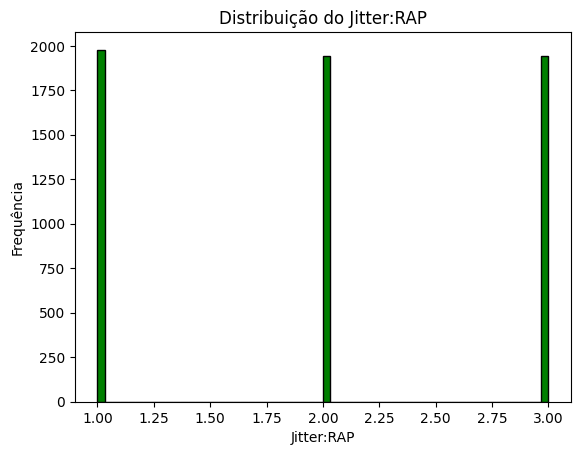

In [58]:
import matplotlib.pyplot as plt

df['Jitter:RAP'] = pd.qcut(df['Jitter:RAP'], q=3, labels=[1, 2, 3])
df['Jitter:RAP'] = df['Jitter:RAP'].astype('int64')

plt.hist(df['Jitter:RAP'], bins=60, color='green', edgecolor='black')
plt.title('Distribuição do Jitter:RAP')
plt.xlabel('Jitter:RAP')
plt.ylabel('Frequência')
plt.show()

#Jitter:PPQ5
O gráfico de histograma representa a distribuição da medida Jitter:PPQ5 (Jitter pertinente a períodos de curta duração), que se concentra principalmente em valores baixos. Isso sugere que a maioria das amostras de voz possui pouca variação na frequência fundamental em relação a períodos de curta duração, embora haja algumas amostras com valores mais elevados.

Através do gráfico, é possível inferir que os valores não estão bem distribuídos, relevando a presença de pontos discrepantes tanto com uma frequência alta, quanto com uma frequência baixa.

Para confirmar a análise, utilizamos a função calcularQTD_outliers.

Quantidade de Outliers:  422


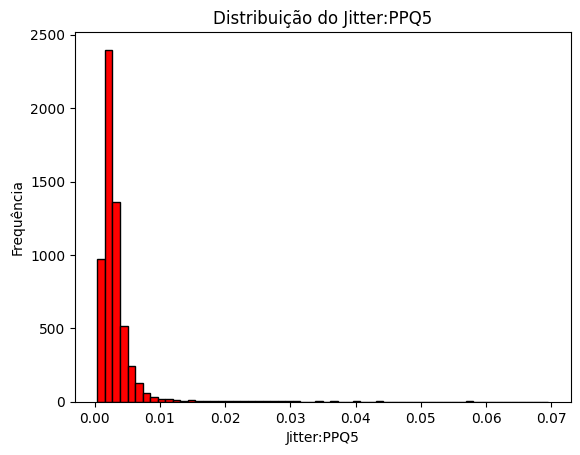

In [59]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Jitter:PPQ5', df))

plt.hist(df['Jitter:PPQ5'], bins=60, color='red', edgecolor='black')
plt.title('Distribuição do Jitter:PPQ5')
plt.xlabel('Jitter:PPQ5')
plt.ylabel('Frequência')
plt.show()

Como os valores estão distribuídos em um intervalo pequeno, achamos por melhor dividir os valores em 3 quartis. Além disso, mudamos o tipo da coluna de category para int64 para que possamos utilizá-la na matriz de correlação futuramente.

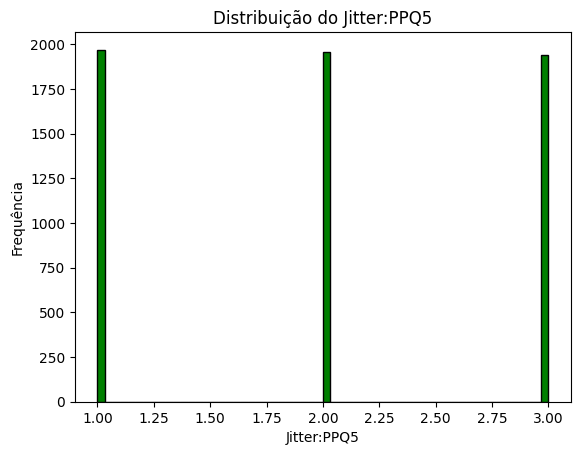

In [60]:
import matplotlib.pyplot as plt

df['Jitter:PPQ5'] = pd.qcut(df['Jitter:PPQ5'], q=3, labels=[1, 2, 3])
df['Jitter:PPQ5'] = df['Jitter:PPQ5'].astype('int64')

plt.hist(df['Jitter:PPQ5'], bins=60, color='green', edgecolor='black')
plt.title('Distribuição do Jitter:PPQ5')
plt.xlabel('Jitter:PPQ5')
plt.ylabel('Frequência')
plt.show()

#Jitter:DDP
O gráfico de histograma para Jitter:DDP (Taxa de Jitter absoluta - Diferença entre os ciclos) mostra a distribuição dessa medida. A maior parte das amostras tem valores baixos de Jitter:DDP, mas há algumas com valores mais elevados. Isso indica que a maioria das amostras tem variação limitada na frequência fundamental entre ciclos, mas algumas apresentam maior variação.

Essa variação deixa claro a evidência de outliers nessa coluna. Percebe-se, no gráfico, que o Jitter:DDP está concentrada em uma determinada frequência. Entretanto, há Jitter:DDP que possui valores discrepantes em relação à média geral.

Além disso, foi comprovada a presença de outliers através da função calcularQTD_outliers.

Quantidade de Outliers:  410


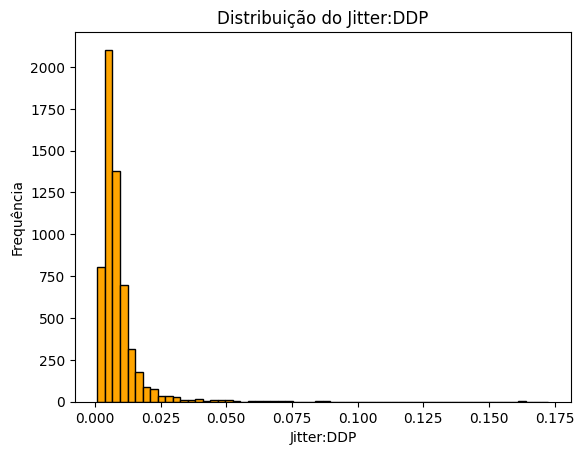

In [61]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Jitter:DDP', df))

plt.hist(df['Jitter:DDP'], bins=60, color='orange', edgecolor='black')
plt.title('Distribuição do Jitter:DDP')
plt.xlabel('Jitter:DDP')
plt.ylabel('Frequência')
plt.show()

#Shimmer
O boxplot exibe a distribuição do Shimmer. O Shimmer é uma métrica que quantifica a variação na amplitude da voz. Ele mostra a mediana, quartis, possíveis outliers e a variabilidade dos dados. A mediana representa a linha no meio da caixa, os quartis são as bordas da caixa e os outliers são os pontos fora das "cerquinhas". A maior parte das amostras tem baixa variação de amplitude (Shimmer), mas há alguns valores discrepantes.

Além da análise visual do gráfico, podemos comprovar a presença de outliers através da função calcularQTD_outliers.

Quantidade de Outliers:  332


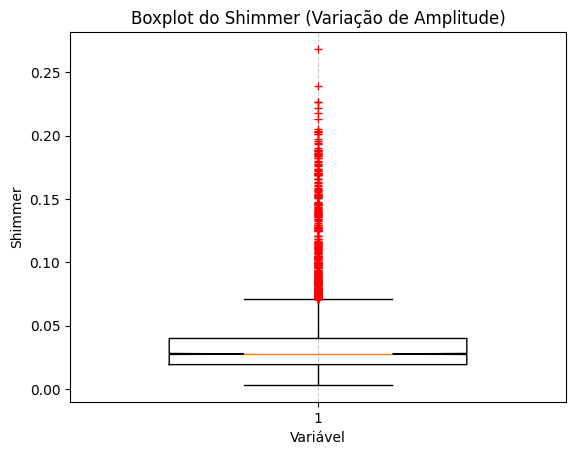

In [62]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Shimmer', df))

plt.boxplot(df['Shimmer'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer (Variação de Amplitude)')
plt.xlabel('Variável')
plt.ylabel('Shimmer')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#ShimmerDB
O boxplot exibe a distribuição do Shimmer em decibéis. Da mesma forma, ele mostra a mediana, quartis, possíveis outliers e a variabilidade dos dados. A maioria das amostras possui baixa variação de amplitude em decibéis (Shimmer(dB)), mas há alguns valores discrepantes.

Além da análise visual do gráfico, podemos comprovar a presença de outliers através da função calcularQTD_outliers

Quantidade de Outliers:  216


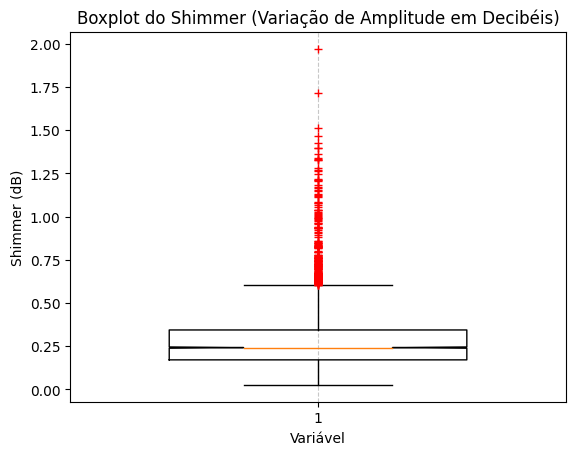

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Shimmer(dB)', df))

plt.boxplot(df['Shimmer(dB)'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer (Variação de Amplitude em Decibéis)')
plt.xlabel('Variável')
plt.ylabel('Shimmer (dB)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#Shimmer:APQ3
O boxplot do Shimmer:APQ3 mostra a distribuição da variação de amplitude, com ênfase no terceiro quartil (Q3). A maioria das amostras tem baixa variação de amplitude, embora alguns valores atípicos sejam observados, indicando variações mais extremas em alguns trechos dos dados.

Ao utilizar a função calcularQTD.outliers, percebe-se também a presença de outliers.

Quantidade de Outliers:  330


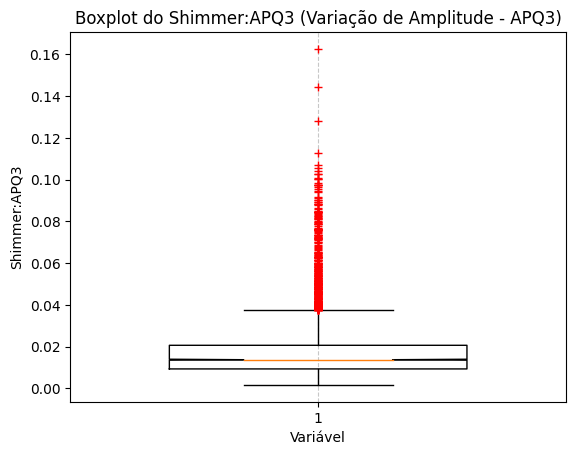

In [63]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Shimmer:APQ3', df))

plt.boxplot(df['Shimmer:APQ3'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:APQ3 (Variação de Amplitude - APQ3)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:APQ3')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#Shimmer:APQ5
O boxplot exibe a distribuição do Shimmer:APQ5. Ele mostra a mediana, quartis, possíveis outliers e a variabilidade dos dados. A maioria das amostras possui baixa variação de amplitude em relação ao Shimmer:APQ5, embora existam valores atípicos.

A presença de outliers também pode ser percebida através da função calcularQTD_outliers.

Quantidade de Outliers:  222


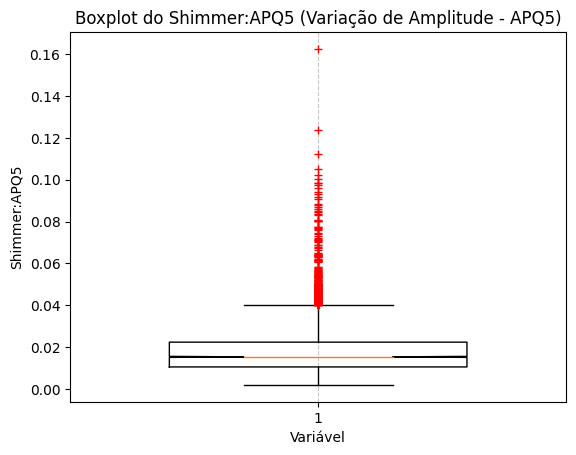

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Shimmer:APQ5', df))

plt.boxplot(df['Shimmer:APQ5'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:APQ5 (Variação de Amplitude - APQ5)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:APQ5')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#Shimmer:APQ11
O boxplot exibe a distribuição do Shimmer:APQ11. Ele mostra a mediana, quartis, possíveis outliers e a variabilidade dos dados. Percebe-se que os dados que estão entre o primeiro, o segundo e o terceiro quartil estão bem distribuídos. Entretanto, há um grande número de outliers e fica bem perceptível ao fazer uma análise visual do gráfico.

Além da análise visual do gráfico, o uso da função calcularQTD.outliers deixa evidente a presença de outliers.

Quantidade de Outliers:  218


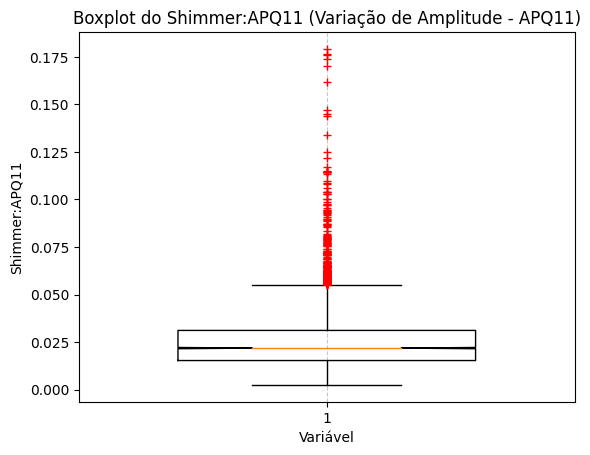

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Shimmer:APQ11', df))

plt.boxplot(df['Shimmer:APQ11'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:APQ11 (Variação de Amplitude - APQ11)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:APQ11')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#Shimmer:DDA
O boxplot do Shimmer:DDA revela a distribuição da medida de variação de amplitude. Analisando o gráfico, pode-se perceber que a distribuição dos valores estão mais concentrados entre a mediana e o terceiro quartil. O gráfico também indica a presença de alguns valores atípicos (outliers), sugerindo que algumas amostras apresentam variações mais extremas na amplitude da voz.

Ainda complementando a análise, o uso da função calcularQTD_outliers também indica a presença de outliers.

Quantidade de Outliers:  215


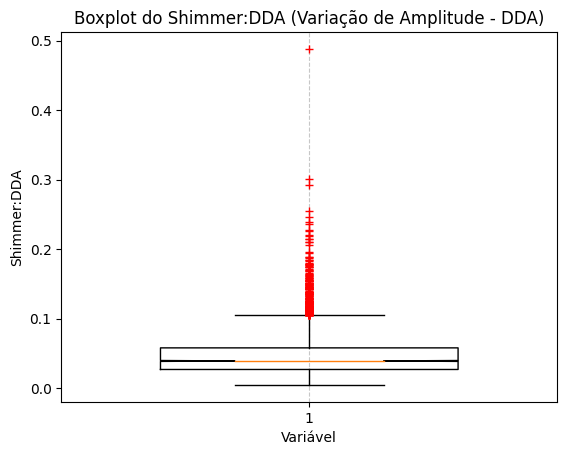

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Shimmer:DDA', df))

plt.boxplot(df['Shimmer:DDA'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:DDA (Variação de Amplitude - DDA)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:DDA')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#NHR
O boxplot do NHR destaca a distribuição da relação entre ruído e componentes tonais na voz. o gráfico indica que os valores desse conjunto estão distribuídos em valores muito próximos. Entretanto, é notável a presença de diversos valores discrepantes, o que pode ser um problema para o aprendizado de algum futuro algoritmo.

Para comprovar a presença de outliers, além do gráfico, utilizamos a função calcularQTD_outliers que também evidenciou a presença dos valores discrepantes.

Quantidade de Outliers:  280


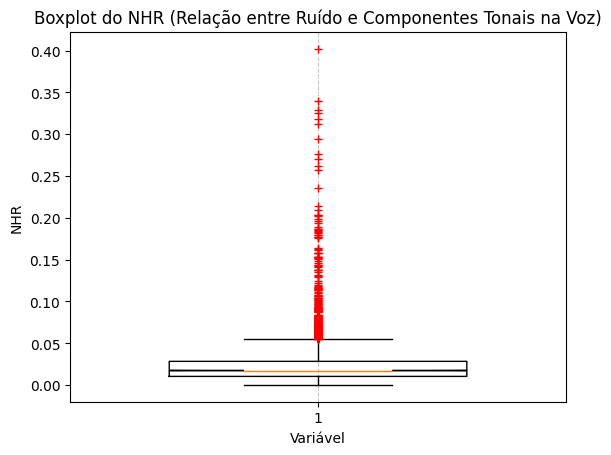

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('NHR', df))

plt.boxplot(df['NHR'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do NHR (Relação entre Ruído e Componentes Tonais na Voz)')
plt.xlabel('Variável')
plt.ylabel('NHR')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#HNR
O boxplot do HNR mostra a distribuição da medida de relação harmônico-ruído. A mediana está no centro da caixa, representando a maior parte dos valores. Há evidência clara de valores atípicos no boxplot, tanto no limite inferior quanto no limite superior. Analisando os quartis, percebe-se que há uma uniformidade de distribuição de dados.

Para comprovar a presença de outliers, podemos utilizar a função calcularQTD_outliers.

Quantidade de Outliers:  85


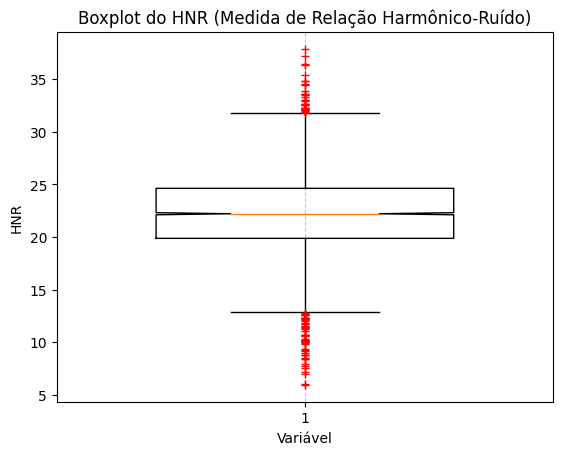

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('HNR', df))

plt.boxplot(df['HNR'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do HNR (Medida de Relação Harmônico-Ruído)')
plt.xlabel('Variável')
plt.ylabel('HNR')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#RPDE
O boxplot do RPDE representa a distribuição da medida de complexidade dinâmica não linear. A mediana está centrada na caixa, indicando a concentração da maioria dos valores. O boxplot mostra poucos valores atípicos significativos, sugerindo que a medida de complexidade é relativamente consistente nas amostras.

Para fazer a medição da quantidade de outliers e comprovar a sua existência, utilizamos a função calcularQTD_outliers.

Quantidade de Outliers:  24


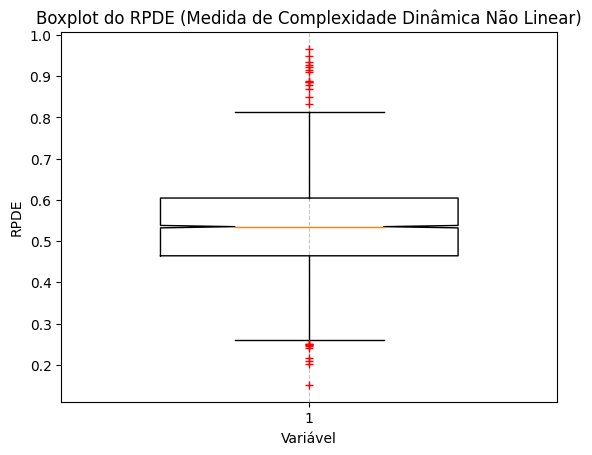

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('RPDE', df))

plt.boxplot(df['RPDE'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do RPDE (Medida de Complexidade Dinâmica Não Linear)')
plt.xlabel('Variável')
plt.ylabel('RPDE')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

 # DFA
 O boxplot do DFA destaca a distribuição da medida de expoente de escala fractal do sinal. Não há evidências de valores atípicos, sugerindo que a medida de escala fractal é consistente nas amostras.

 Para fazer a medição da quantidade de outliers e comprovar a sua ausência, utilizamos a função calcularQTD_outliers.

Quantidade de Outliers:  0


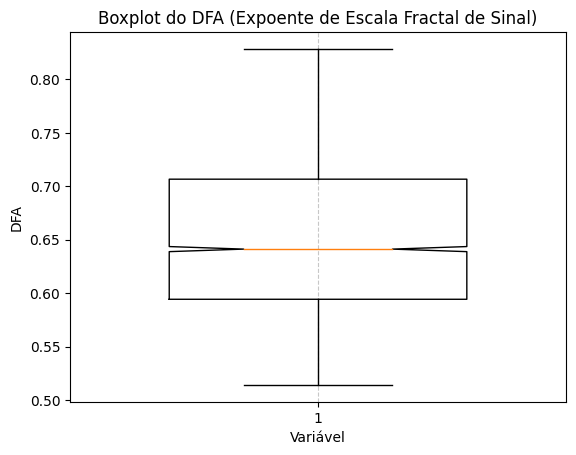

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('DFA', df))

plt.boxplot(df['DFA'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do DFA (Expoente de Escala Fractal de Sinal)')
plt.xlabel('Variável')
plt.ylabel('DFA')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#PPE
O boxplot do PPE mostra a distribuição da medida não linear da variação da frequência fundamental. O boxplot sugere a presença de valores atípicos, indicando que algumas amostras apresentam variações mais extremas na frequência fundamental em relação ao PPE.

Para fazer a medição da quantidade de outliers e comprovar a sua existência, utilizamos a função calcularQTD_outliers.

Quantidade de Outliers:  64


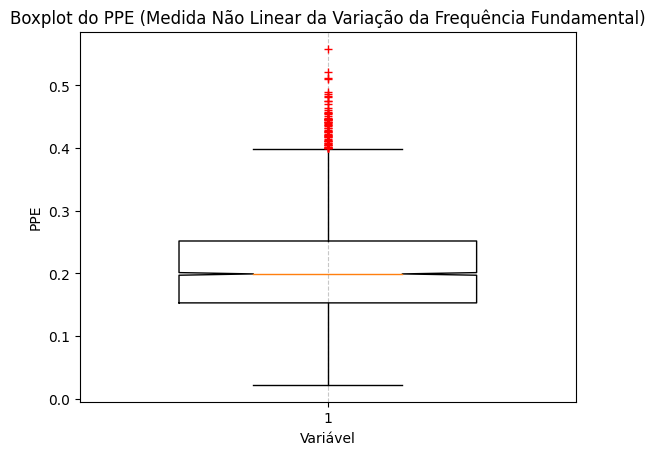

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('PPE', df))

plt.boxplot(df['PPE'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do PPE (Medida Não Linear da Variação da Frequência Fundamental)')
plt.xlabel('Variável')
plt.ylabel('PPE')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Tratando os Outliers



Além de visualizar os outliers presentes nos gráficos acima, optamos por visualizar quantos outliers específicos existem por coluna.


In [64]:
lista = []
variacaoOutliers = df.columns
for colunas in variacaoOutliers:
  lista.append((colunas, calcularQTD_outliers(colunas, df)))

pd.DataFrame(lista, columns=['coluna', 'quantidade_outliers'])

,coluna,quantidade_outliers
0,sex,0
1,test_time,0
2,motor_UPDRS,0
3,Jitter(%),397
4,Jitter(Abs),365
5,Jitter:RAP,0
6,Jitter:PPQ5,0
7,Jitter:DDP,410
8,Shimmer,332
9,Shimmer(dB),331



Substituimos os outliers no meu conjunto de dados "parkinsons_updrs" pela mediana das respectivas colunas para mitigar o impacto de valores extremos que poderiam distorcer as análises. A escolha da mediana preserva a tendência central, tornando a interpretação mais robusta e reduzindo a influência de observações atípicas. Isso é especialmente relevante em conjuntos de dados de saúde, como o parkinsons_updrs, onde valores extremos podem surgir devido a variações naturais ou erros de medição, garantindo assim resultados mais confiáveis.

In [65]:
substituir_outliers_por_mediana(df)

,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS_discretizada,age_discretizada
0,0,6.0,28.199,0.00662,0.000034,3,3,0.01204,0.02565,0.230,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,3,1
1,0,13.0,28.447,0.00300,0.000017,1,1,0.00395,0.02024,0.179,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,3,1
2,0,20.0,28.695,0.00481,0.000025,2,2,0.00616,0.01675,0.181,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,3,1
3,0,26.0,28.905,0.00528,0.000027,2,2,0.00573,0.02309,0.327,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,3,1
4,0,34.0,29.187,0.00335,0.000020,1,1,0.00278,0.01703,0.176,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,0,143.0,22.485,0.00406,0.000031,1,1,0.00500,0.01896,0.160,...,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,3,1
5871,0,150.0,21.988,0.00297,0.000025,1,1,0.00358,0.02315,0.215,...,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,3,1
5872,0,157.0,21.495,0.00349,0.000025,1,1,0.00456,0.02499,0.244,...,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,3,1
5873,0,164.0,21.007,0.00281,0.000020,1,1,0.00383,0.01484,0.131,...,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,3,1


verificamos novamente a quantidade de outliers por coluna. Tomamos essa atitude pois ainda que vemovamos os outliers, outros novos podem surgir porque alteramos os limites superiores e inferiores.

In [66]:
lista = []
variacaoOutliers = df.columns
for colunas in variacaoOutliers:
  lista.append((colunas, calcularQTD_outliers(colunas, df)))

pd.DataFrame(lista, columns=['coluna', 'quantidade_outliers'])

,coluna,quantidade_outliers
0,sex,0
1,test_time,0
2,motor_UPDRS,0
3,Jitter(%),173
4,Jitter(Abs),155
5,Jitter:RAP,0
6,Jitter:PPQ5,0
7,Jitter:DDP,181
8,Shimmer,122
9,Shimmer(dB),116


Nesse caso, consideramos essa quantidade de outliers aceitável para o projeto, considerando que ainda vamos remover algumas colunas de acordo com a matriz de correlação.

#Reduzindo a Dimensionalidade dos Dados

A princípio, esse trecho do tratamento de dados se resume a verificar quais variáveis preditivas tem uma grande relação entre si e qual o nível de relação com a variável alvo.

Através disso, faremos o redimensionamento das colunas para deixar a nossa base de dados mais direta.

Começaremos visualizando a matriz de correlação novamente. Dessa vez, com o tratamento de outliers nas colunas.

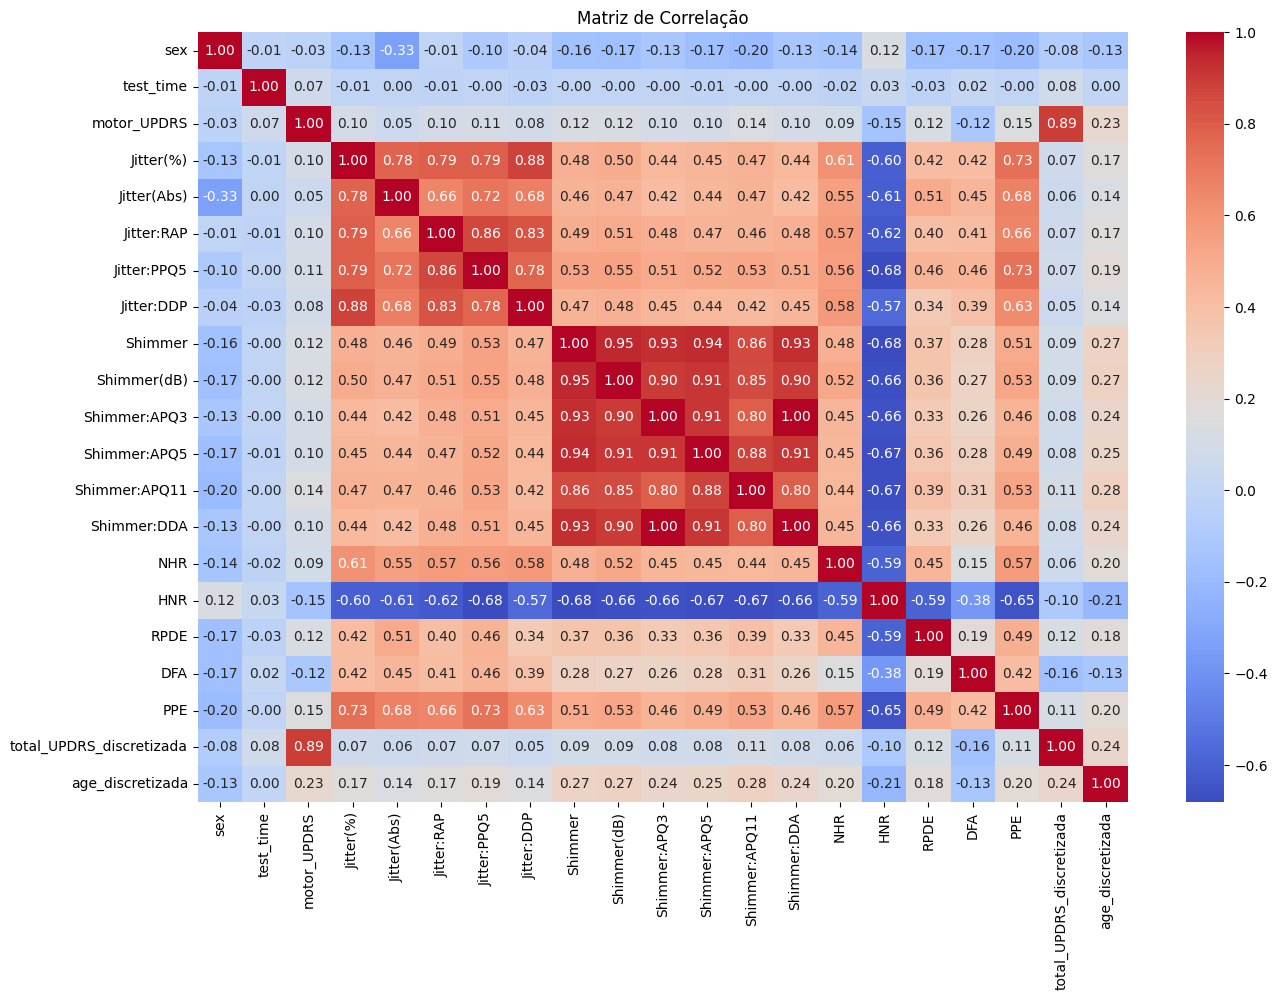

In [67]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

As colunas relacionadas ao Jitter possuem uma grande correlação entre si. Entretanto, somente a Jitter(%) possui a maior correlação com a nossa coluna alvo. Dessa forma, achamos por necessário remover as outras colunas Jitter que possuam uma correlação maior do que 80%.

In [68]:
df.drop(columns='Jitter(Abs)', axis=1, inplace=True)

df.drop(columns='Jitter:RAP', axis=1, inplace=True)

df.drop(columns='Jitter:PPQ5', axis=1, inplace=True)

df.drop(columns='Jitter:DDP', axis=1, inplace=True)

Em relação as colunas relativas ao Shimmer, seguiremos a mesma lógica e removeremos as colunas que possuem uma correlação maior do que 80% e deixaremos a que possui uma maior correlação com a nossa variável alvo

In [69]:
df.drop(columns='Shimmer', axis=1, inplace=True)
df.drop(columns='Shimmer(dB)', axis=1, inplace=True)
df.drop(columns='Shimmer:APQ5', axis=1, inplace=True)
df.drop(columns='Shimmer:APQ11', axis=1, inplace=True)

Após retiradas algumas colunas, verificaremos a nossa base de dados juntamente com a matriz de correlação.

In [70]:
df.head()

,sex,test_time,motor_UPDRS,Jitter(%),Shimmer:APQ3,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS_discretizada,age_discretizada
0,0,6.0,28.199,0.00662,0.01438,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,3,1
1,0,13.0,28.447,0.00300,0.00994,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,3,1
2,0,20.0,28.695,0.00481,0.00734,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,3,1
3,0,26.0,28.905,0.00528,0.01106,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,3,1
4,0,34.0,29.187,0.00335,0.00679,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,3,1


para utilizar o describe, achamos necessário remover as colunas discretizadas pois não faz sentido visualizar a média, valores máximos e mínimos etc.

In [71]:
colunas_descartadas_describe = df[['total_UPDRS_discretizada', 'age_discretizada']]

df.drop(colunas_descartadas_describe, axis=1).describe()

,sex,test_time,motor_UPDRS,Jitter(%),Shimmer:APQ3,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,0.318438,92.987037,21.289655,0.005061,0.014644,0.043933,0.020131,21.976784,0.541001,0.653252,0.209640
std,0.465910,53.335812,8.133419,0.002039,0.007219,0.021657,0.012580,3.519503,0.098441,0.070955,0.074703
min,0.000000,0.000000,5.037700,0.000830,0.001610,0.004840,0.000286,11.843000,0.258780,0.514040,0.021983
25%,0.000000,47.000000,15.000000,0.003580,0.009280,0.027830,0.010953,19.680000,0.470255,0.596100,0.156385
50%,0.000000,92.000000,20.871000,0.004900,0.013700,0.041110,0.018448,21.917000,0.542250,0.643550,0.205560
75%,1.000000,138.000000,27.594000,0.006120,0.018415,0.055245,0.026531,24.396000,0.612935,0.711480,0.254745
max,1.000000,215.000000,39.511000,0.011610,0.037520,0.112570,0.062223,32.006000,0.826700,0.865600,0.426690


Visualizando a nova matriz de correlação com as colunas removidas.

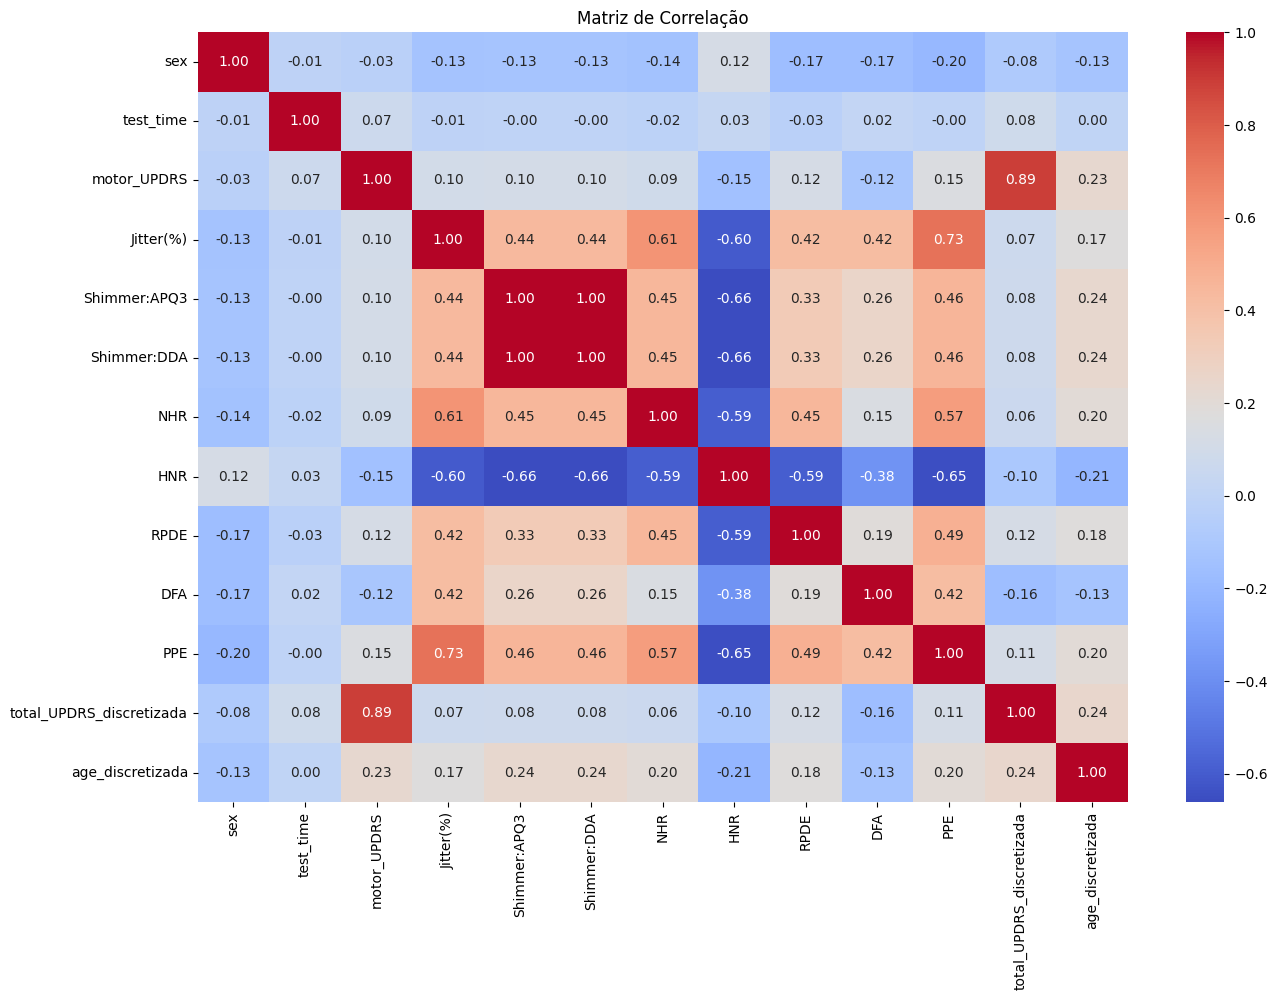

In [72]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

#Revisão dos gráficos
Após tratar os outliers que conseguimos tratar, achamos necessário refazer os gráficos das colunas que não foram discretizadas ou excluídas para analisar a nova distribuição.

#Jitter(%)
No gráfico do jitter(%) que vemos abaixo, notamos que os dados se distribuiram de forma mais uniforme comparado ao gráfico anterior. Isso devido a substituição dos outliers pela mediana, a tendencia central foi preservada.

Quantidade de Outliers:  60


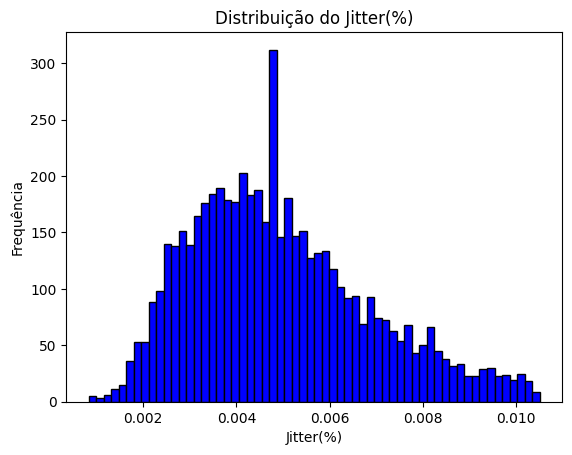

In [ ]:
print("Quantidade de Outliers: ", calcularQTD_outliers('Jitter(%)', df))

plt.hist(df['Jitter(%)'], bins=60, color='blue', edgecolor='black')
plt.title('Distribuição do Jitter(%)')
plt.xlabel('Jitter(%)')
plt.ylabel('Frequência')
plt.show()

#ShimmerAPQ3

Neste gráfico, notamos que a quantidade de outliers diminuiu consideravelmente comparado ao gráfico anterior desta mesma coluna. Notamos também que os dados foram melhormente distribuídos devido ao tratamento dos outliers.

Quantidade de Outliers:  112


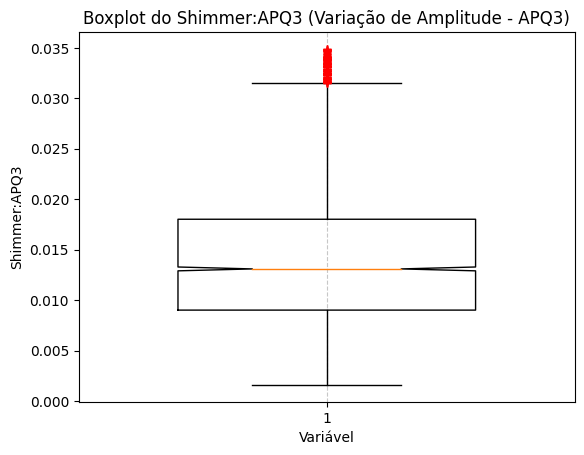

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Shimmer:APQ3', df))

plt.boxplot(df['Shimmer:APQ3'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:APQ3 (Variação de Amplitude - APQ3)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:APQ3')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#ShimmerDDA

Notamos que este gráfico é bastante parecido com o gráfico anterior, mudando apenas a dimensão dos dados. Mais uma vez, a quantidade de outliers foi fortemente abstraída, sobrando apenas alguns que podem ter sugido após a mudança dos limites superiores e inferiores.

Quantidade de Outliers:  112


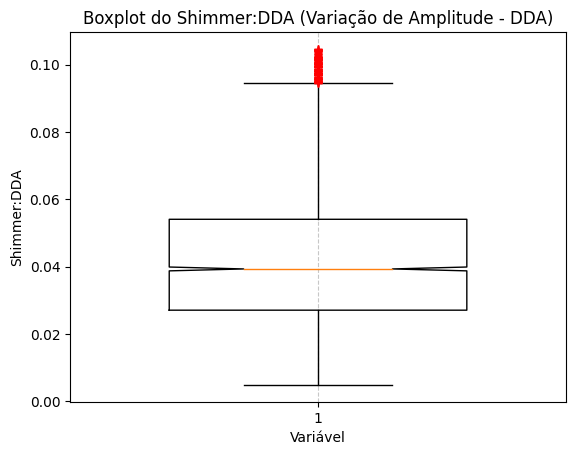

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('Shimmer:DDA', df))

plt.boxplot(df['Shimmer:DDA'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:DDA (Variação de Amplitude - DDA)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:DDA')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#NHR

Quantidade de Outliers:  146


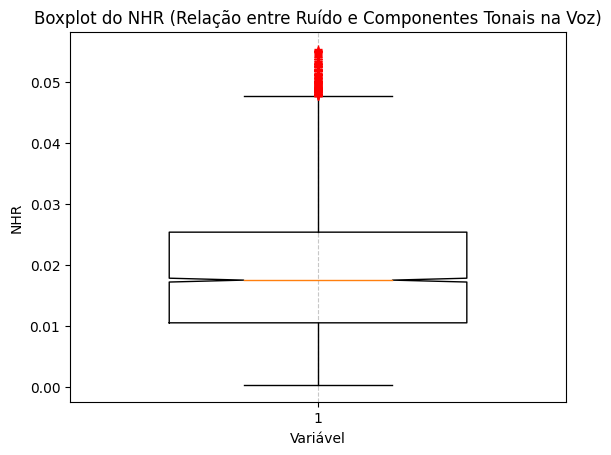

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('NHR', df))

plt.boxplot(df['NHR'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do NHR (Relação entre Ruído e Componentes Tonais na Voz)')
plt.xlabel('Variável')
plt.ylabel('NHR')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#HNR


Quantidade de Outliers:  12


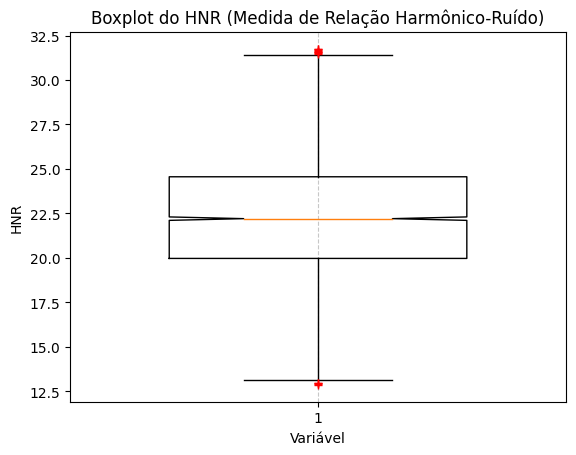

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('HNR', df))

plt.boxplot(df['HNR'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do HNR (Medida de Relação Harmônico-Ruído)')
plt.xlabel('Variável')
plt.ylabel('HNR')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#RPDE

Quantidade de Outliers:  1


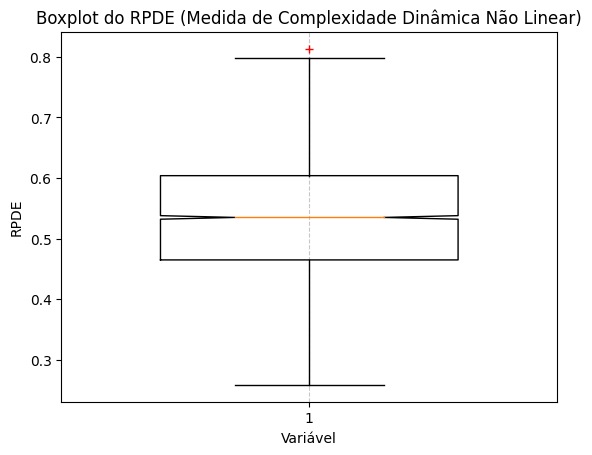

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('RPDE', df))

plt.boxplot(df['RPDE'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do RPDE (Medida de Complexidade Dinâmica Não Linear)')
plt.xlabel('Variável')
plt.ylabel('RPDE')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#DFA

Quantidade de Outliers:  0


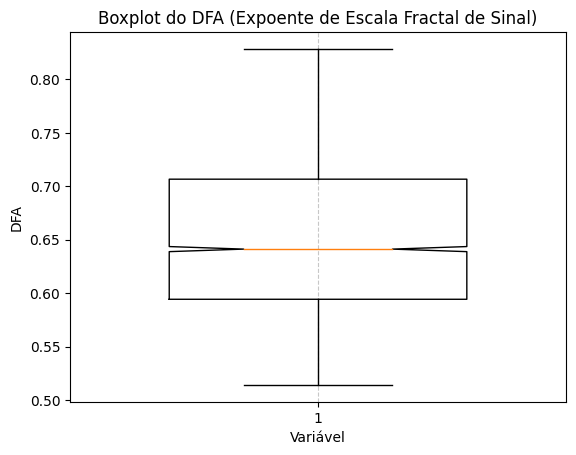

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('DFA', df))

plt.boxplot(df['DFA'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do DFA (Expoente de Escala Fractal de Sinal)')
plt.xlabel('Variável')
plt.ylabel('DFA')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#PPE

Quantidade de Outliers:  13


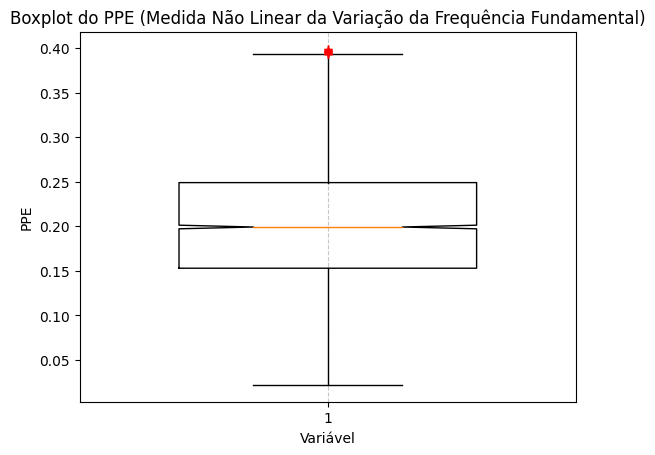

In [ ]:
import matplotlib.pyplot as plt

print("Quantidade de Outliers: ", calcularQTD_outliers('PPE', df))

plt.boxplot(df['PPE'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do PPE (Medida Não Linear da Variação da Frequência Fundamental)')
plt.xlabel('Variável')
plt.ylabel('PPE')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#Conclusão do tratamento de outliers

Após o tratamento dos outliers, notamos que a distribuição dos dados nos gráficos se tornou muito mais uniforme comparado aos gráficos anteriores. Não foi possível tratar todos os outliers presentes nesta base pois, a medida que faziamos alterações como discretizações e substituição por mediana, outros outliers iriam surgindo. Optamos por não excluir os valores atípicos remanescentes pois, dessa forma, perderíamos dados valiosos para a nossa análise.

# Dividindo o conjunto de treinamento, teste e validação

A princípio, analisamos que os dados das colunas que iremos utilizar estão distribuídas de uma forma relativamente proporcional.
Dessa forma, realizaremos a estratificação dos dados para preservar a distribuição nos conjuntos de treinamento e teste, além da validação.

In [73]:
df.head()

,sex,test_time,motor_UPDRS,Jitter(%),Shimmer:APQ3,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS_discretizada,age_discretizada
0,0,6.0,28.199,0.00662,0.01438,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,3,1
1,0,13.0,28.447,0.00300,0.00994,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,3,1
2,0,20.0,28.695,0.00481,0.00734,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,3,1
3,0,26.0,28.905,0.00528,0.01106,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,3,1
4,0,34.0,29.187,0.00335,0.00679,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,3,1


Nesse momento, decidimos pegar todos as colunas da minha base de dados e passar como entrada, exceto a total_UPDRS_discretizada que será relativo à gravidade da doença e é o que queremos prever.

In [80]:
from sklearn.model_selection import train_test_split

# features (X) e variável alvo (Y)
X = df[['sex', 'test_time', 'motor_UPDRS', 'Jitter(%)', 'Shimmer:APQ3', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE', 'age_discretizada']]
Y = df['total_UPDRS_discretizada']

# Divisão estratificada em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

# Verificando as formas (shapes) dos conjuntos
print("Shape do conjunto de treinamento (X_treino):", X_treino.shape)
print("Shape do conjunto de validação (X_validacao):", X_validacao.shape)
print("Shape do conjunto de teste (X_teste):", X_test.shape)

Shape do conjunto de treinamento (X_treino): (4103, 12)
Shape do conjunto de validação (X_validacao): (880, 12)
Shape do conjunto de teste (X_teste): (1759, 12)


#Escolhendo os 3 algoritmos de classificação

#RANDON FLOREST

A princípio, escolhemos pelo primeiro algoritmo como sendo o Random Florest pelos motivos:
1. Pode lidar com conjuntos de dados grandes com muitas features.
2. Robusto e geralmente produz bons resultados sem ajustes finos.
3. Lida bem com overfitting devido à técnica de ensemble (combinando múltiplas árvores de decisão).

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Criar o modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100)

# Treinar o modelo com o conjunto de treinamento
random_forest_model.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
Y_pred = random_forest_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Imprimir as métricas de desempenho
print(f'Acurácia: {accuracy:.4f}')

# Imprimir a Matriz de Confusão
print('\nMatriz de Confusão:')
print(conf_matrix)


Acurácia: 0.9494

Matriz de Confusão:
[[315  10   0   0]
 [ 18 647  10   0]
 [  0  15 432  10]
 [  0   0  26 276]]


#MLP

Os motivos para a escolha desse algoritmo foram:
1. Capacidade de Aprender Padrões Complexos: MLPClassifier pode aprender padrões complexos e não lineares em dados tabulares, benéfico quando há relações intricadas entre features.

2. Versatilidade em Dados e Problemas: MLPs são versáteis e aplicáveis a diversos tipos de dados, mostrando bom desempenho em tarefas de classificação.

3. Representação Hierárquica: MLPs, com camadas ocultas, podem aprender representações hierárquicas, identificando automaticamente características relevantes em camadas mais profundas.

In [76]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200)

# Treinar o modelo
mlp_model.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
Y_pred = mlp_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Imprimir as métricas de desempenho
print(f'Acurácia: {accuracy:.4f}')
print('\nRelatório de Classificação:')

# Imprimir a Matriz de Confusão
print('\nMatriz de Confusão:')
print(conf_matrix)

Acurácia: 0.8891

Relatório de Classificação:

Matriz de Confusão:
[[301  24   0   0]
 [ 24 615  35   1]
 [  0  31 380  46]
 [  0   0  34 268]]


#SVM

Os motivos para a escolha desse algoritmo foram:
1. Eficiência em Espaços de Alta Dimensionalidade: SVM é eficiente em espaços de alta dimensionalidade, tornando-o adequado para conjuntos de dados com muitas features, como o seu.
2. Capacidade de Lidar com Dados Não Lineares: SVM pode usar kernels para mapear dados em espaços de maior dimensionalidade, permitindo a separação eficiente de classes não lineares.
3. Robustez em Relação a Overfitting: SVM é menos propenso a overfitting, especialmente em conjuntos de dados menores, proporcionando uma boa generalização.

In [77]:
from sklearn.svm import SVC

# Criar o modelo SVM
svm_model = SVC(kernel='linear', C=1.0)

# Treinar o modelo com o conjunto de treinamento
svm_model.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
Y_pred = svm_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Imprimir as métricas de desempenho
print(f'Acurácia: {accuracy:.4f}')
print('\nRelatório de Classificação:')

# Imprimir a Matriz de Confusão
print('\nMatriz de Confusão:')
print(conf_matrix)

Acurácia: 0.8152

Relatório de Classificação:

Matriz de Confusão:
[[274  51   0   0]
 [101 525  49   0]
 [  0  35 389  33]
 [  0   0  56 246]]
